<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/%E5%A4%A9%E6%B1%A0_%E8%AF%AD%E4%B9%89%E5%88%86%E5%89%B2_task1_%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90_%26_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1 入门语义分割 赛题理解

#### 1.1 完成任务如下 
+ 理解赛题背景和赛题数据
+ 完成赛题报名和数据下载
+ 数据可视化
+ 完成Task-1课后作业
+ 完成baseline

In [ ]:
!wget http://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531872/%E5%9C%B0%E8%A1%A8%E5%BB%BA%E7%AD%91%E7%89%A9%E8%AF%86%E5%88%AB/test_a.zip

In [ ]:
!wget http://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531872/%E5%9C%B0%E8%A1%A8%E5%BB%BA%E7%AD%91%E7%89%A9%E8%AF%86%E5%88%AB/test_a_samplesubmit.csv

In [ ]:
!wget http://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531872/%E5%9C%B0%E8%A1%A8%E5%BB%BA%E7%AD%91%E7%89%A9%E8%AF%86%E5%88%AB/train.zip

In [ ]:
!wget http://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531872/%E5%9C%B0%E8%A1%A8%E5%BB%BA%E7%AD%91%E7%89%A9%E8%AF%86%E5%88%AB/train_mask.csv.zip

In [ ]:
!unzip /content/test_a.zip

In [ ]:
!unzip /content/train.zip

In [1]:
!cp /content/drive/MyDrive/dataset/train.zip /content/

In [2]:
!cp /content/drive/MyDrive/dataset/test_a.zip /content/

In [3]:
!cp /content/drive/MyDrive/dataset/test_a_samplesubmit.csv  /content/

In [4]:
!cp /content/drive/MyDrive/dataset/train_mask.csv  /content/

## 行程编码理解
+ 行程编码也叫作RLE压缩编码，其中RLE是Run-Length-Encoding的缩写， 这种压缩方法是最简单的图像压缩方法。<br>
+ 行程编码的基本原理是在给定的数据图像中寻找连续的重复数值，然后用两个字符取代这些连续值。例如，一串字母表示的数据为“aaabbbbccccdddeeddaa”，经过 游程编码处理可表示为“3a4b4c3d2e2d2a”。<br>
+ 对于数字图像而言，同一幅图像某些连续的区域颜色相同，即在这些图像中，许 多连续的扫描都具有同一种颜色，或者同一扫描行中许多连续的像素都具有同样的 颜色值.在这种情况下，只要存储一个像素的颜色值、相同颜色像素的位置以及相同 颜色的像素数目即可，对数字图像的这种编码称为行程编码，把具有相同灰度值（颜 色值）的相连像素序列称为一个行程。

### 编码原理
RLE压缩算法（下简称RLE算法）的基本思路是把数据按照线性序列分成两种情况：一种是连续的重复数据块，另一种是连续的不重复数据块。

RLE算法的原理就是用一个表示块数的属性加上一个数据块代表原来连续的若干块数据，从而达到节省存储空间的目的。一般RLE算法都选择数据块的长度为 1 字节，表示块数的诚性也用1字节表示，对于颜色数小于 256 色的图像文件或文本文件，块长度选择 1 字节是比较合适的。

### RLE与图片之间的转换

In [ ]:
import numpy as np
import pandas as pd
import cv2

# 将图片编码为rle格式
def rle_encode(im):
    '''
    im: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = im.flatten(order = 'F')
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

# 将rle格式进行解码为图片
def rle_decode(mask_rle, shape=(512, 512)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape, order='F')

In [ ]:
train_mask = pd.read_csv('train_mask.csv', sep='\t', names=['name', 'mask']) #读取mask

In [ ]:
train_mask['name'].iloc[0]

'KWP8J3TRSV.jpg'

In [ ]:
train_mask['mask']

0        1 33 82 125 292 254 594 125 804 254 1106 125 1...
1                                                      NaN
2                                                      NaN
3        135016 4 135527 8 136039 12 136551 15 137062 2...
4        301 53 504 9 812 54 1016 9 1324 54 1528 9 1836...
                               ...                        
29995    123 53 222 33 348 15 635 53 735 33 857 19 1147...
29996    96 38 150 6 240 66 383 15 400 64 496 17 627 19...
29997    105 3 294 26 806 26 1318 26 1830 26 14119 27 1...
29998    169 15 187 24 235 86 681 15 699 24 747 86 1193...
29999    31 34 76 21 138 96 372 68 543 34 579 30 651 95...
Name: mask, Length: 30000, dtype: object

In [ ]:
# 读取第一张图，并将对于的rle解码为mask矩阵
img = cv2.imread('train/'+ train_mask['name'].iloc[0])
mask = rle_decode(train_mask['mask'].iloc[0])

print(rle_encode(mask) == train_mask['mask'].iloc[0])
# 结果为True

True


### 1可视化数据集

(-0.5, 511.5, 511.5, -0.5)

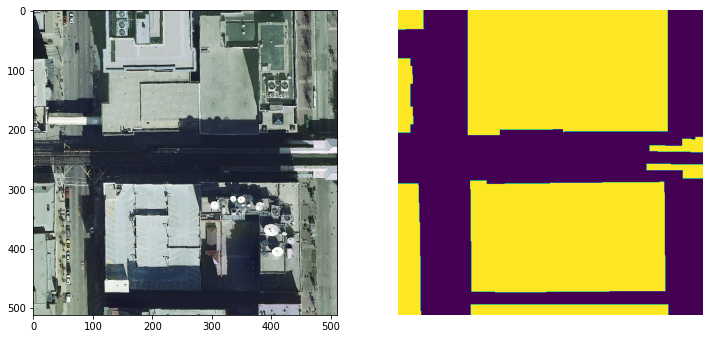

In [ ]:
import matplotlib.pyplot as plt # plt 用于显示图片
plt.figure(figsize = (12,9))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(mask)
plt.axis('off')

### 2统计所有图片整图中没有任何建筑物像素占所有训练集图片的比例；

In [ ]:
nums = 0
for i in train_mask['mask']:
  if str(i) == 'nan':
    nums += 1
print('有 %d 个图像未包含建筑物像素'%nums)

print("**************"*4)
total_nums = len(train_mask)
print('共有 %d 个训练数据'%total_nums)
print("没有任何建筑物像素占所有训练集图片的比例为:%s"%(nums/total_nums))


有 5204 个图像未包含建筑物像素
********************************************************
共有 30000 个训练数据
没有任何建筑物像素占所有训练集图片的比例为:0.17346666666666666


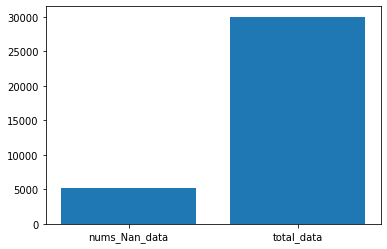

In [ ]:
data = [nums,total_nums]
labels = ['nums_Nan_data', 'total_data']
plt.bar(range(len(data)),data,tick_label=labels)
plt.show()

### 3统计所有图片中建筑物像素占所有像素的比例；

In [ ]:
# 计算建筑物像素所占比例函数
def count_pixels(mask_rle):
    '''
    mask_rle: run-length as string formated (start length)
    Returns sum_pixels/total_pixels
    '''
    s = mask_rle.split()
    lengths = [np.asarray(x, dtype=int) for x in s[1:][::2]]
    sum_pixels= sum(lengths)
    total_pixels = 512*512 
    return sum_pixels/total_pixels

In [ ]:
#存储所有图片中建筑物像素占所有像素的比例
list_ratio_of_building_pixels = []
for i in train_mask['mask']:
  if str(i) == 'nan':
    list_ratio_of_building_pixels.append(0)
  else:
    list_ratio_of_building_pixels.append(count_pixels(i))


In [ ]:
print(list_ratio_of_building_pixels[:10])

[0.5703392028808594, 0, 0, 0.05690765380859375, 0.07985687255859375, 0.053836822509765625, 0.2154541015625, 0.00048065185546875, 0, 0.2032012939453125]


Text(0.5, 1.0, 'The ratio of building pixels to all pixels is 0.21')

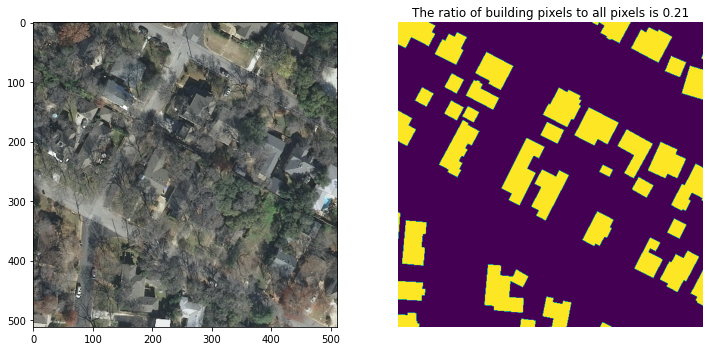

In [ ]:
img_6 = cv2.imread('train/'+ train_mask['name'].iloc[6])
mask_6 = rle_decode(train_mask['mask'].iloc[6])
import matplotlib.pyplot as plt # plt 用于显示图片
plt.figure(figsize = (12,9))
plt.subplot(1,2,1)
plt.imshow(img_6)
plt.subplot(1,2,2)
plt.imshow(mask_6)
plt.axis('off')
plt.title('The ratio of building pixels to all pixels is %.4s' %list_ratio_of_building_pixels[6])

### 4.统计所有图片中建筑物区域平均区域大小；

In [ ]:
# 计算建筑物像素个数函数
def count_pixels_nums(mask_rle):
    '''
    mask_rle: run-length as string formated (start length)
    Returns sum_pixels
    '''
    s = mask_rle.split()
    lengths = [np.asarray(x, dtype=int) for x in s[1:][::2]]
    sum_pixels= sum(lengths)
    return sum_pixels

In [ ]:
#存储所有图片中建筑物像素个数
list_building_pixels_nums = []
for i in train_mask['mask']:
  if str(i) == 'nan':
    list_building_pixels_nums.append(0)
  else:
    list_building_pixels_nums.append(count_pixels_nums(i))


<function count_pixels_nums at 0x7f2a2239ba60>


In [ ]:
print(list_building_pixels_nums[:10])

[149511, 0, 0, 14918, 20934, 14113, 56480, 126, 0, 53268]


In [ ]:
import math
from numpy import *
#求平均值
mean_nums = mean(list_building_pixels_nums)
mean_area_size = math.sqrt(mean_nums)
print("训练集平均建筑区域像素点为 %f * %f"%(mean_area_size,mean_area_size))

训练集平均建筑区域像素点为 202.923501 * 202.923501


## Baseline 实现


In [ ]:
!pip install rasterio

In [10]:
import numpy as np
import pandas as pd
import pathlib, sys, os, random, time
import numba, cv2, gc
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from tqdm.notebook import tqdm

import albumentations as A

import rasterio
from rasterio.windows import Window

def rle_encode(im):
    '''
    im: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = im.flatten(order = 'F')
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

def rle_decode(mask_rle, shape=(512, 512)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape, order='F')

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as D

import torchvision
from torchvision import transforms as T

In [12]:
EPOCHES = 20
BATCH_SIZE = 32
IMAGE_SIZE = 256
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu' 

trfm = A.Compose([
    A.Resize(IMAGE_SIZE, IMAGE_SIZE),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(),
])

In [13]:
class TianChiDataset(D.Dataset):
    def __init__(self, paths, rles, transform, test_mode=False):
        self.paths = paths
        self.rles = rles
        self.transform = transform
        self.test_mode = test_mode
        
        self.len = len(paths)
        self.as_tensor = T.Compose([
            T.ToPILImage(),
            T.Resize(IMAGE_SIZE),
            T.ToTensor(),
            T.Normalize([0.625, 0.448, 0.688],
                        [0.131, 0.177, 0.101]),
        ])
        
    # get data operation
    def __getitem__(self, index):
        img = cv2.imread(self.paths[index])
        if not self.test_mode:
            mask = rle_decode(self.rles[index])
            augments = self.transform(image=img, mask=mask)
            return self.as_tensor(augments['image']), augments['mask'][None]
        else:
            return self.as_tensor(img), ''        
    
    def __len__(self):
        """
        Total number of samples in the dataset
        """
        return self.len

In [14]:
train_mask = pd.read_csv('/content/train_mask.csv', sep='\t', names=['name', 'mask'])
train_mask['name'] = train_mask['name'].apply(lambda x: '/content/train/' + x)

img = cv2.imread(train_mask['name'].iloc[0])
mask = rle_decode(train_mask['mask'].iloc[0])

print(rle_encode(mask) == train_mask['mask'].iloc[0])

True


In [15]:

dataset = TianChiDataset(
    train_mask['name'].values,
    train_mask['mask'].fillna('').values,
    trfm, False
)

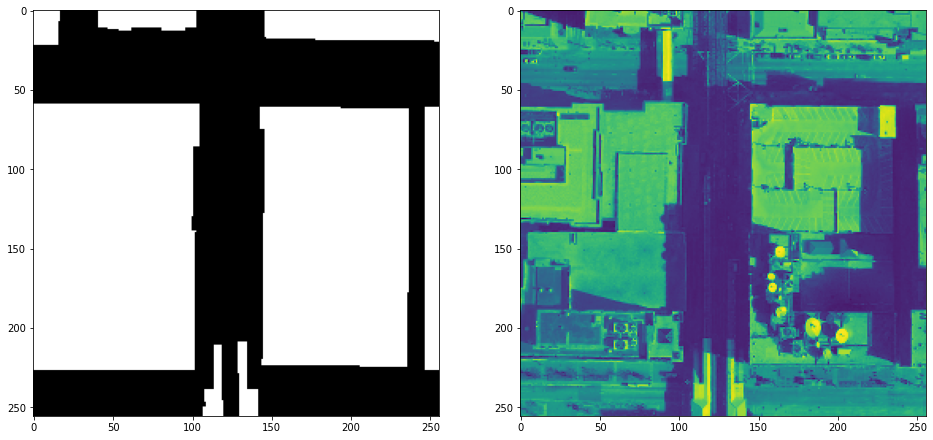

In [16]:
image, mask = dataset[0]
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(mask[0], cmap='gray')
plt.subplot(122)
plt.imshow(image[0]);

In [17]:
valid_idx, train_idx = [], []
for i in range(len(dataset)):
    if i % 7 == 0:
        valid_idx.append(i)
    else:
        train_idx.append(i)
        
train_ds = D.Subset(dataset, train_idx)
valid_ds = D.Subset(dataset, valid_idx)

# define training and validation data loaders
loader = D.DataLoader(
    train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=1)

vloader = D.DataLoader(
    valid_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=1)

In [18]:
def get_model():
    model = torchvision.models.segmentation.fcn_resnet50(True)
    
#     pth = torch.load("../input/pretrain-coco-weights-pytorch/fcn_resnet50_coco-1167a1af.pth")
#     for key in ["aux_classifier.0.weight", "aux_classifier.1.weight", "aux_classifier.1.bias", "aux_classifier.1.running_mean", "aux_classifier.1.running_var", "aux_classifier.1.num_batches_tracked", "aux_classifier.4.weight", "aux_classifier.4.bias"]:
#         del pth[key]
    
    model.classifier[4] = nn.Conv2d(512, 1, kernel_size=(1, 1), stride=(1, 1))
    return model

@torch.no_grad()
def validation(model, loader, loss_fn):
    losses = []
    model.eval()
    for image, target in loader:
        image, target = image.to(DEVICE), target.float().to(DEVICE)
        output = model(image)['out']
        loss = loss_fn(output, target)
        losses.append(loss.item())
        
    return np.array(losses).mean()

In [19]:
model = get_model()
model.to(DEVICE);

optimizer = torch.optim.AdamW(model.parameters(),
                  lr=1e-4, weight_decay=1e-3)

class SoftDiceLoss(nn.Module):
    def __init__(self, smooth=1., dims=(-2,-1)):

        super(SoftDiceLoss, self).__init__()
        self.smooth = smooth
        self.dims = dims
    
    def forward(self, x, y):
        tp = (x * y).sum(self.dims)
        fp = (x * (1 - y)).sum(self.dims)
        fn = ((1 - x) * y).sum(self.dims)
        
        dc = (2 * tp + self.smooth) / (2 * tp + fp + fn + self.smooth)
        dc = dc.mean()
        return 1 - dc
    
bce_fn = nn.BCEWithLogitsLoss()
dice_fn = SoftDiceLoss()

def loss_fn(y_pred, y_true):
    bce = bce_fn(y_pred, y_true)
    dice = dice_fn(y_pred.sigmoid(), y_true)
    return 0.8*bce+ 0.2*dice

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth


In [20]:
header = r'''
        Train | Valid
Epoch |  Loss |  Loss | Time, m
'''
#          Epoch         metrics            time
raw_line = '{:6d}' + '\u2502{:7.3f}'*2 + '\u2502{:6.2f}'
print(header)

EPOCHES = 5
best_loss = 10
for epoch in range(1, EPOCHES+1):
    losses = []
    start_time = time.time()
    model.train()
    for image, target in tqdm_notebook(loader):
        
        image, target = image.to(DEVICE), target.float().to(DEVICE)
        optimizer.zero_grad()
        output = model(image)['out']
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        # print(loss.item())
        
    vloss = validation(model, vloader, loss_fn)
    print(raw_line.format(epoch, np.array(losses).mean(), vloss,
                              (time.time()-start_time)/60**1))
    losses = []
    
    if vloss < best_loss:
        best_loss = vloss
        torch.save(model.state_dict(), 'model_best.pth')


        Train | Valid
Epoch |  Loss |  Loss | Time, m




     1│  0.245│  0.203│ 22.90



     2│  0.181│  0.162│ 23.08



     3│  0.157│  0.154│ 23.05



     4│  0.149│  0.149│ 23.05



     5│  0.144│  0.145│ 23.06


In [21]:

trfm = T.Compose([
    T.ToPILImage(),
    T.Resize(IMAGE_SIZE),
    T.ToTensor(),
    T.Normalize([0.625, 0.448, 0.688],
                [0.131, 0.177, 0.101]),
])

subm = []

model.load_state_dict(torch.load("/content/model_best.pth"))
model.eval()

FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

In [22]:
test_mask = pd.read_csv('/content/test_a_samplesubmit.csv', sep='\t', names=['name', 'mask'])
test_mask['name'] = test_mask['name'].apply(lambda x: '/content/test_a/' + x)

for idx, name in enumerate(tqdm_notebook(test_mask['name'].iloc[:])):
    image = cv2.imread(name)
    image = trfm(image)
    with torch.no_grad():
        image = image.to(DEVICE)[None]
        score = model(image)['out'][0][0]
        score_sigmoid = score.sigmoid().cpu().numpy()
        score_sigmoid = (score_sigmoid > 0.5).astype(np.uint8)
        score_sigmoid = cv2.resize(score_sigmoid, (512, 512))

        
        # break
    subm.append([name.split('/')[-1], rle_encode(score_sigmoid)])

In [26]:
subm = pd.DataFrame(subm)
subm.to_csv('/content/result.csv', index=None, header=None, sep='\t')

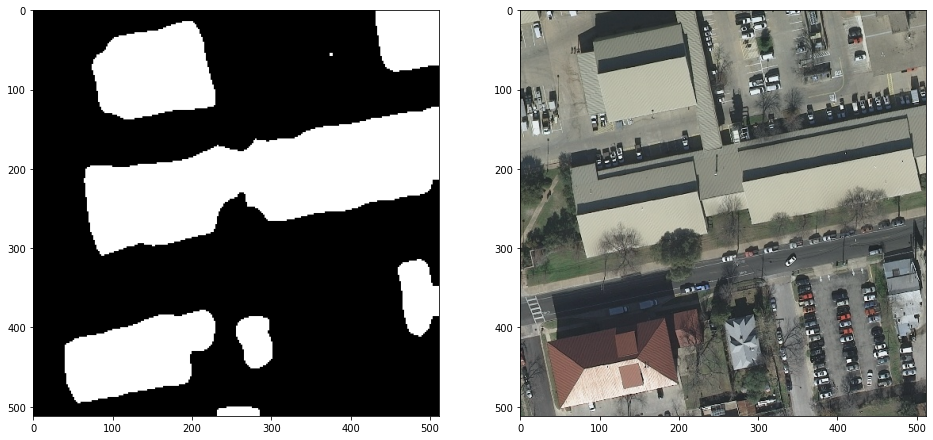

In [25]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(rle_decode(subm[1].fillna('').iloc[3]), cmap='gray')
plt.subplot(122)
plt.imshow(cv2.imread('/content/test_a/' + subm[0].iloc[3]));